# EDU RANK PREDICTION on THE

## Introduction

This notebook is a part of the project for the department of Data Management at Dokuz Eylul University. 




In [220]:
# how can ı const the path

In [221]:
DATA_PATH = "../data/"
SRC_PATH = "../src/"



In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [223]:
# Load the data
data = pd.read_excel(DATA_PATH + "THE.xlsx")

In [224]:
data = data.iloc[:2092] # drop the rank column has NaN values

In [225]:
data.shape # 2092 rows and 29 columns


(2092, 29)

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         2092 non-null   int64  
 1   rank                               2092 non-null   object 
 2   name                               2092 non-null   object 
 3   scores_overall                     2092 non-null   object 
 4   scores_overall_rank                2092 non-null   int64  
 5   scores_teaching                    2092 non-null   float64
 6   scores_teaching_rank               2092 non-null   int64  
 7   scores_research                    2092 non-null   float64
 8   scores_research_rank               2092 non-null   int64  
 9   scores_citations                   2092 non-null   float64
 10  scores_citations_rank              2092 non-null   int64  
 11  scores_industry_income             2092 non-null   float

In [227]:
data.isnull().sum()

rank_order                            0
rank                                  0
name                                  0
scores_overall                        0
scores_overall_rank                   0
scores_teaching                       0
scores_teaching_rank                  0
scores_research                       0
scores_research_rank                  0
scores_citations                      0
scores_citations_rank                 0
scores_industry_income                0
scores_industry_income_rank           0
scores_international_outlook          0
scores_international_outlook_rank     0
record_type                           0
member_level                          0
url                                   0
nid                                   0
location                              0
stats_number_students                 0
stats_student_staff_ratio             0
stats_pc_intl_students                0
stats_female_male_ratio              81
aliases                               0


In [228]:
#data.loc[data['closed'] == 1] No closed universities
data.drop('closed', axis=1, inplace=True)

In [229]:
data['rank'].value_counts() 

rank
1501+        591
1201–1500    302
601–800      203
1001–1200    200
801–1000     195
            ... 
44             1
43             1
42             1
41             1
89             1
Name: count, Length: 142, dtype: int64

In [230]:
data['rank'] = data['rank'].astype(str)
data['stats_number_students'] = data['stats_number_students'].str.replace(',', '').astype(float)


In [231]:
# 1-500, 501-1000, 1001-1200, 1201-1400, 1401-1500, 1501-1600, 1601-1700, 1701-1800, 1800+

# Convert the 'rank' column to integers, handling non-numeric values
data['label'] = data['rank_order'].apply(lambda x: '0-500' if x <= 5000 else '500-1000' if x <= 10000 else '1000-1200' if x <= 12000 else '1200-1400' if x <= 14000 else '1400-1500' if x <= 15000 else '1500-1600' if x <= 16000 else '1600-1700' if x <= 17000 else '1700-1800' if x <= 18000 else '1800+')

In [232]:
data['label'].value_counts()

label
0-500        500
500-1000     500
1800+        292
1000-1200    200
1200-1400    200
1400-1500    100
1500-1600    100
1600-1700    100
1700-1800    100
Name: count, dtype: int64

In [233]:
target = data['label']

In [234]:
data.drop(['rank'], axis=1, inplace=True)


In [235]:
data

,rank_order,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,...,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,unaccredited,disabled,label
0,10,University of Oxford,98.5,10,96.8,5,100.0,1,98.8,8,...,United Kingdom,22095.0,10.8,43%,51 : 49,University of Oxford,"Computer Science,Languages, Literature & Lingu...",False,False,0-500
1,20,Massachusetts Institute of Technology,98.1,20,99.2,1,96.0,11,99.7,1,...,United States,11836.0,8.0,33%,42 : 58,Massachusetts Institute of Technology,"Biological Sciences,Electrical & Electronic En...",False,False,0-500
2,30,Harvard University,97.7,30,97.3,4,99.9,2,99.3,3,...,United States,22584.0,10.0,25%,52 : 48,Harvard University,"Archaeology,Mathematics & Statistics,Art, Perf...",False,False,0-500
3,40,Princeton University,97.5,40,98.3,2,98.0,6,98.9,7,...,United States,8378.0,7.8,23%,47 : 53,Princeton University,"Chemistry,Languages, Literature & Linguistics,...",False,False,0-500
4,50,University of Cambridge,97.4,50,95.9,6,99.9,3,97.6,17,...,United Kingdom,20980.0,11.5,38%,49 : 51,University of Cambridge,"History, Philosophy & Theology,Biological Scie...",False,False,0-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,20880,Yanshan University,10.5–25.1,20880,20.2,1483,12.0,1520,39.7,1353,...,China,39528.0,13.0,1%,37 : 63,Yanshan University,"Art, Performing Arts & Design,Languages, Liter...",False,False,1800+
2088,20890,Yeditepe University,10.5–25.1,20890,20.5,1454,12.1,1506,22.1,1795,...,Turkey,17506.0,29.9,6%,56 : 44,Yeditepe University,"Mechanical & Aerospace Engineering,Sociology,O...",False,False,1800+
2089,20900,Yerevan State University,10.5–25.1,20900,24.8,1098,8.8,1993,8.7,2052,...,Armenia,13923.0,8.0,3%,53 : 47,Yerevan State University,"Mathematics & Statistics,Biological Sciences,P...",False,False,1800+
2090,20910,Yuriy Fedkovych Chernivtsi National University,10.5–25.1,20910,18.0,1705,9.8,1841,8.8,2050,...,Ukraine,12377.0,12.5,1%,49 : 51,Yuriy Fedkovych Chernivtsi National University,"Electrical & Electronic Engineering,Archaeolog...",False,False,1800+


In [236]:
data.drop(columns=['name','url','aliases','unaccredited'], inplace=True)

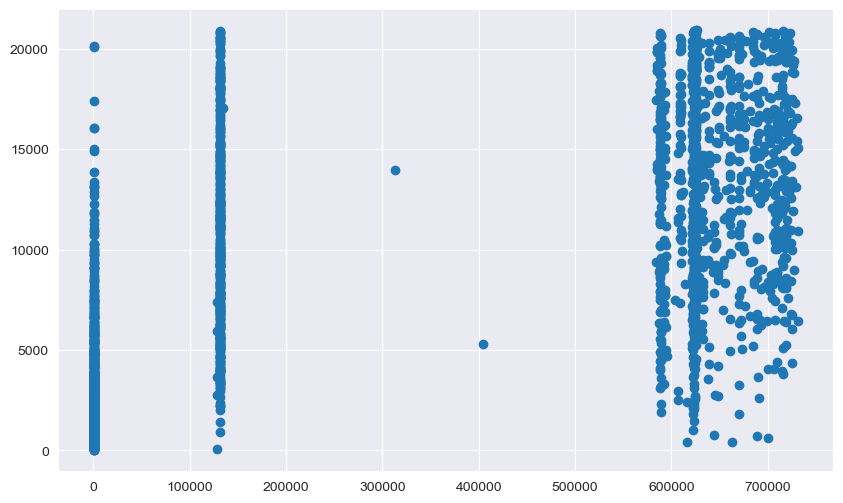

In [237]:
plt.figure(figsize=(10, 6))
plt.scatter(data['nid'],data['rank_order'])

In [238]:
data['scores_overall'] = data['scores_overall'].str.split('–').str[0].astype(float)



In [239]:
data[['rank_order','member_level']].corr()

,rank_order,member_level
rank_order,1.000000,-0.231823
member_level,-0.231823,1.000000


In [240]:
data['location'].value_counts() 

location
United States     174
Japan             119
United Kingdom    107
India             107
China              94
                 ... 
Luxembourg          1
Palestine           1
Bahrain             1
Oman                1
Armenia             1
Name: count, Length: 115, dtype: int64

In [241]:
# location if country count less than 10, convert to 'Other'
country_count = data['location'].value_counts()
data['location'] = data['location'].apply(lambda x: 'Other' if country_count[x] < 6 else x)



In [242]:
data.loc[data['location'] == 'Other']

,rank_order,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,...,member_level,nid,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,subjects_offered,disabled,label
16,170,89.9,170,78.4,24,93.6,15,95.7,41,100.0,...,6,504,Other,34388.0,21.0,26%,49 : 51,"Computer Science,Chemistry,Economics & Econome...",False,0-500
29,300,81.8,300,65.8,51,79.3,30,94.5,54,99.9,...,6,634,Other,26044.0,17.1,29%,48 : 52,"Psychology,Geology, Environmental, Earth & Mar...",False,0-500
180,1810,59.7,1810,37.7,377,39.0,274,90.7,104,70.4,...,11,1027,Other,11573.0,19.2,46%,54 : 46,"General Engineering,Communication & Media Stud...",False,0-500
219,2200,55.8,2200,31.0,693,37.4,302,87.5,171,69.0,...,0,131534,Other,9701.0,8.5,36%,NaN,"Law,Languages, Literature & Linguistics,Civil ...",False,0-500
237,2380,55.8,2380,39.2,333,39.5,261,77.1,401,81.3,...,0,131698,Other,5860.0,22.1,52%,54 : 46,"Computer Science,Physics & Astronomy,Economics...",False,0-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,20410,10.5,20410,20.2,1481,11.2,1627,20.8,1825,26.6,...,0,677010,Other,22458.0,13.5,4%,65 : 35,"Sport Science,Economics & Econometrics,Mathema...",False,1800+
2053,20540,10.5,20540,20.7,1444,8.8,1991,10.5,2022,24.0,...,0,131353,Other,20855.0,10.9,1%,60 : 40,"Medicine & Dentistry,Geology, Environmental, E...",False,1800+
2064,20650,10.5,20650,15.1,1901,9.9,1824,29.2,1613,21.4,...,0,670626,Other,23677.0,26.9,2%,40 : 60,"Archaeology,Mechanical & Aerospace Engineering...",False,1800+
2066,20670,10.5,20670,14.2,1950,10.6,1711,39.3,1361,21.0,...,0,707981,Other,23476.0,18.3,0%,51 : 49,"General Engineering,Mathematics & Statistics,L...",False,1800+


In [243]:
data['location'].value_counts(  )

location
United States     174
Japan             119
United Kingdom    107
India             107
Other             102
                 ... 
Norway              6
Philippines         6
Peru                6
Sri Lanka           6
Slovakia            6
Name: count, Length: 62, dtype: int64

In [244]:
# 2. Target Encoding
from sklearn.preprocessing import LabelEncoder



In [245]:
data

,rank_order,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,...,member_level,nid,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,subjects_offered,disabled,label
0,10,98.5,10,96.8,5,100.0,1,98.8,8,99.6,...,0,468,United Kingdom,22095.0,10.8,43%,51 : 49,"Computer Science,Languages, Literature & Lingu...",False,0-500
1,20,98.1,20,99.2,1,96.0,11,99.7,1,100.0,...,0,471,United States,11836.0,8.0,33%,42 : 58,"Biological Sciences,Electrical & Electronic En...",False,0-500
2,30,97.7,30,97.3,4,99.9,2,99.3,3,85.7,...,0,466,United States,22584.0,10.0,25%,52 : 48,"Archaeology,Mathematics & Statistics,Art, Perf...",False,0-500
3,40,97.5,40,98.3,2,98.0,6,98.9,7,96.9,...,0,469,United States,8378.0,7.8,23%,47 : 53,"Chemistry,Languages, Literature & Linguistics,...",False,0-500
4,50,97.4,50,95.9,6,99.9,3,97.6,17,88.4,...,0,470,United Kingdom,20980.0,11.5,38%,49 : 51,"History, Philosophy & Theology,Biological Scie...",False,0-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,20880,10.5,20880,20.2,1483,12.0,1520,39.7,1353,49.1,...,0,623463,China,39528.0,13.0,1%,37 : 63,"Art, Performing Arts & Design,Languages, Liter...",False,1800+
2088,20890,10.5,20890,20.5,1454,12.1,1506,22.1,1795,49.6,...,0,624663,Turkey,17506.0,29.9,6%,56 : 44,"Mechanical & Aerospace Engineering,Sociology,O...",False,1800+
2089,20900,10.5,20900,24.8,1098,8.8,1993,8.7,2052,20.9,...,0,715426,Other,13923.0,8.0,3%,53 : 47,"Mathematics & Statistics,Biological Sciences,P...",False,1800+
2090,20910,10.5,20910,18.0,1705,9.8,1841,8.8,2050,17.2,...,0,626145,Ukraine,12377.0,12.5,1%,49 : 51,"Electrical & Electronic Engineering,Archaeolog...",False,1800+


In [246]:
le = LabelEncoder()
data['location'] = le.fit_transform(data['location'])

# One-hot encoding
one_hot_record_type = pd.get_dummies(data['record_type'], drop_first=True)
one_hot_disabled = pd.get_dummies(data['disabled'], drop_first=True)

# Concatenate the one-hot encoded columns with the original DataFrame
data = pd.concat([data, one_hot_record_type, one_hot_disabled], axis=1)
data.drop(['record_type', 'disabled'], axis=1, inplace=True)

In [247]:

data['subjects_offered lenth'] = data['subjects_offered'].str.split(',').str.len()
data.drop('subjects_offered', axis=1, inplace=True)

In [248]:
data

,rank_order,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,...,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,label,private,public,True,subjects_offered lenth
0,10,98.5,10,96.8,5,100.0,1,98.8,8,99.6,...,59,22095.0,10.8,43%,51 : 49,0-500,False,False,False,32
1,20,98.1,20,99.2,1,96.0,11,99.7,1,100.0,...,60,11836.0,8.0,33%,42 : 58,0-500,True,False,False,28
2,30,97.7,30,97.3,4,99.9,2,99.3,3,85.7,...,60,22584.0,10.0,25%,52 : 48,0-500,True,False,False,33
3,40,97.5,40,98.3,2,98.0,6,98.9,7,96.9,...,60,8378.0,7.8,23%,47 : 53,0-500,True,False,False,26
4,50,97.4,50,95.9,6,99.9,3,97.6,17,88.4,...,59,20980.0,11.5,38%,49 : 51,0-500,False,False,False,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,20880,10.5,20880,20.2,1483,12.0,1520,39.7,1353,49.1,...,9,39528.0,13.0,1%,37 : 63,1800+,False,False,False,26
2088,20890,10.5,20890,20.5,1454,12.1,1506,22.1,1795,49.6,...,56,17506.0,29.9,6%,56 : 44,1800+,False,False,False,28
2089,20900,10.5,20900,24.8,1098,8.8,1993,8.7,2052,20.9,...,37,13923.0,8.0,3%,53 : 47,1800+,False,False,False,3
2090,20910,10.5,20910,18.0,1705,9.8,1841,8.8,2050,17.2,...,57,12377.0,12.5,1%,49 : 51,1800+,False,False,False,27


In [249]:
data['stats_pc_intl_students'] = data['stats_pc_intl_students'].str.replace('%', '').astype(float) / 100
data['stats_female_ratio'] = data['stats_female_male_ratio'].str.split(':').str[0].astype(float) / 100
data.drop('stats_female_male_ratio' , axis=1, inplace=True)

In [250]:
data['stats_female_ratio'].fillna(data['stats_female_ratio'].mean(), inplace=True)

C:\Users\firat\AppData\Local\Temp\ipykernel_21680\3430330915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['stats_female_ratio'].fillna(data['stats_female_ratio'].mean(), inplace=True)


In [251]:
data.isnull().sum()

rank_order                           0
scores_overall                       0
scores_overall_rank                  0
scores_teaching                      0
scores_teaching_rank                 0
scores_research                      0
scores_research_rank                 0
scores_citations                     0
scores_citations_rank                0
scores_industry_income               0
scores_industry_income_rank          0
scores_international_outlook         0
scores_international_outlook_rank    0
member_level                         0
nid                                  0
location                             0
stats_number_students                0
stats_student_staff_ratio            0
stats_pc_intl_students               0
label                                0
private                              0
public                               0
True                                 0
subjects_offered lenth               0
stats_female_ratio                   0
dtype: int64

In [271]:
data = data[['nid', 'location', 'stats_number_students', 'stats_pc_intl_students', 'stats_student_staff_ratio', 'scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook','member_level','public','private','subjects_offered lenth']]


In [272]:
data

,nid,location,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,member_level,public,private,subjects_offered lenth
0,468,59,22095.0,0.43,10.8,96.8,100.0,98.8,99.6,97.3,0,False,False,32
1,471,60,11836.0,0.33,8.0,99.2,96.0,99.7,100.0,93.8,0,False,True,28
2,466,60,22584.0,0.25,10.0,97.3,99.9,99.3,85.7,90.1,0,False,True,33
3,469,60,8378.0,0.23,7.8,98.3,98.0,98.9,96.9,87.4,0,False,True,26
4,470,59,20980.0,0.38,11.5,95.9,99.9,97.6,88.4,97.1,0,False,False,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,623463,9,39528.0,0.01,13.0,20.2,12.0,39.7,49.1,20.6,0,False,False,26
2088,624663,56,17506.0,0.06,29.9,20.5,12.1,22.1,49.6,40.1,0,False,False,28
2089,715426,37,13923.0,0.03,8.0,24.8,8.8,8.7,20.9,39.0,0,False,False,3
2090,626145,57,12377.0,0.01,12.5,18.0,9.8,8.8,17.2,28.5,0,False,False,27


# Model Building

In [273]:
# Pairwise Ranking
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import sklearn.metrics as mt




In [274]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)



In [275]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((1673, 14), (419, 14), (1673,), (419,))

In [276]:
models = [RandomForestClassifier(), GradientBoostingClassifier()]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Ada Boosting']
confusion_matrices = []
model_predict = pd.DataFrame({'original': y_test})
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_predict[name] = y_pred
    model_predict[name + ' accuracy'] = mt.accuracy_score(y_test, y_pred)
    confusion_matrices.append(mt.confusion_matrix(y_test, y_pred))



    
    
    

    


In [278]:
model_predict

,original,Logistic Regression,Logistic Regression accuracy,Random Forest,Random Forest accuracy
1280,1200-1400,1000-1200,0.696897,1000-1200,0.687351
29,0-500,0-500,0.696897,0-500,0.687351
210,0-500,0-500,0.696897,0-500,0.687351
1730,1700-1800,1800+,0.696897,1800+,0.687351
584,500-1000,500-1000,0.696897,500-1000,0.687351
...,...,...,...,...,...
1894,1800+,1800+,0.696897,1800+,0.687351
1080,1000-1200,500-1000,0.696897,500-1000,0.687351
962,500-1000,500-1000,0.696897,500-1000,0.687351
1606,1600-1700,1200-1400,0.696897,1200-1400,0.687351


In [279]:
confusion_matrices

[array([[100,   0,   0,   0,   0,   0,   0,   0,   5],
        [  0,  21,   6,   0,   0,   0,   0,   0,  14],
        [  0,   4,  26,   1,   0,   0,   1,   1,   3],
        [  0,   5,   4,   4,   0,   0,   0,   1,   0],
        [  0,   0,   2,   0,   0,   0,   2,  17,   0],
        [  0,   0,   5,   0,   2,   3,   0,  15,   0],
        [  0,   0,   0,   0,   0,   3,   2,  15,   0],
        [  0,   0,   9,   0,   1,   6,   3,  41,   0],
        [  1,   1,   0,   0,   0,   0,   0,   0,  95]], dtype=int64),
 array([[103,   0,   0,   0,   0,   0,   0,   0,   2],
        [  0,  26,   7,   0,   0,   0,   0,   0,   8],
        [  0,  11,  20,   2,   0,   2,   0,   1,   0],
        [  0,   6,   4,   3,   0,   0,   0,   1,   0],
        [  0,   0,   3,   0,   1,   1,   0,  16,   0],
        [  0,   0,   2,   1,   2,   1,   5,  14,   0],
        [  0,   0,   1,   0,   0,   3,   4,  12,   0],
        [  0,   0,   9,   0,   4,   4,   3,  40,   0],
        [  2,   4,   1,   0,   0,   0,   0,   0,  

In [280]:
# Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mt.accuracy_score(y_test, y_pred)


0.6921241050119332

In [281]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV




In [282]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [267]:
grid_search.best_params_



{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [283]:
model = RandomForestClassifier(**grid_search.best_params_)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mt.accuracy_score(y_test, y_pred)


0.7064439140811456

<Axes: xlabel='feature'>

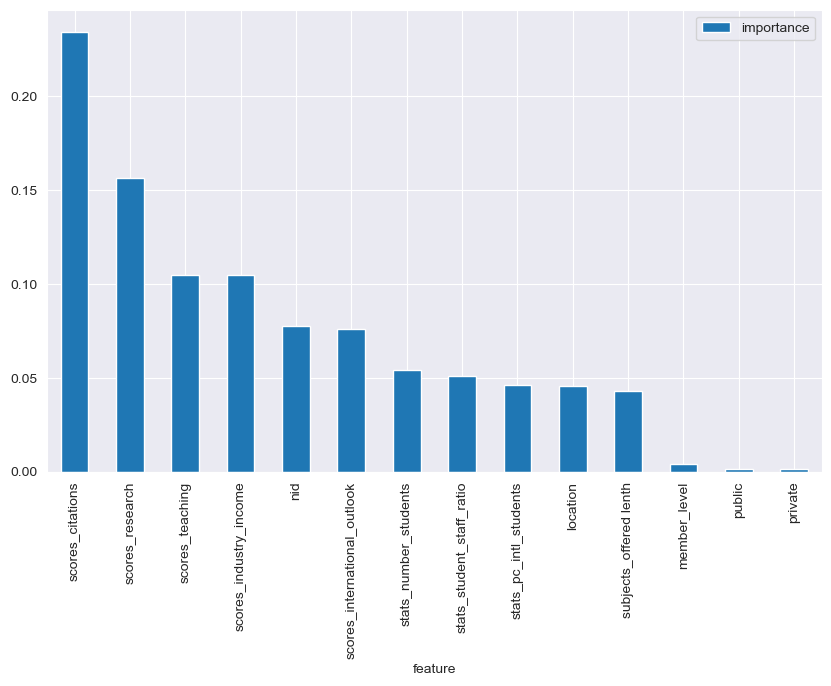

In [284]:
# Feature Importance
feature_importances = model.feature_importances_
features = X_train.columns
feature_importances_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)
feature_importances_df.sort_values('importance', ascending=False).plot(x='feature', y='importance', kind='bar', figsize=(10, 6))


In [286]:
# Gradient Boosting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mt.accuracy_score(y_test, y_pred)


0.6897374701670644

In [287]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [288]:
grid_search.best_params_



{'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 300}

In [289]:
model = GradientBoostingClassifier(**grid_search.best_params_)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mt.accuracy_score(y_test, y_pred)


0.684964200477327

In [290]:
# data save
data['rank'] = target
data.to_csv(DATA_PATH + 'THE_cleaned.csv', index=False)